In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Wine.csv')

In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,13].values

In [17]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

In [20]:
#In a unsupervised learning Algorithm we need information of y_train also in fit_transform
X_train = lda.fit_transform(X_train,y_train)

In [21]:
X_test = lda.transform(X_test)

In [25]:
# Print X_train
print(X_train)

[[ 3.57315552  1.94018924]
 [ 0.85475898 -2.08182977]
 [ 0.62173655 -3.06234453]
 [ 4.80786412  2.00638739]
 [-3.8579759   0.14987256]
 [-3.59455458  1.24961706]
 [-0.53772906 -3.0852704 ]
 [ 0.04058577 -2.47312446]
 [ 0.99835348 -3.36989668]
 [-3.74095658  1.94844242]
 [ 3.76035226  0.82126218]
 [-0.15106412 -1.86820292]
 [ 3.62762899  2.05460026]
 [-3.94229781  2.80328429]
 [ 3.33429017  0.73627798]
 [ 3.90206871  1.03276135]
 [-3.55835472  0.18783108]
 [ 5.63175281  2.40524214]
 [-5.56217254  0.85694946]
 [ 0.23296188 -3.94615581]
 [ 5.03141997  3.23313754]
 [ 3.52861651  0.94605778]
 [-1.17815662 -2.17294825]
 [ 3.58320131  0.67947364]
 [ 5.21649905  2.41090952]
 [-3.01647841  1.24411621]
 [ 1.86178658 -0.47484926]
 [ 3.93816398 -0.2204059 ]
 [-1.0836235  -3.32496762]
 [ 1.8691488  -0.63362283]
 [ 3.27717205  1.51263542]
 [-0.47842302 -1.16766723]
 [-4.14433134  1.37391708]
 [ 2.45009727 -2.49336285]
 [-1.20844631 -2.30679956]
 [ 2.55631466 -0.98550214]
 [-1.6091476   0.55066705]
 

In [27]:
#Print X_test
X_test

array([[-3.83960313,  1.54567265],
       [ 5.24601727,  1.72358501],
       [-0.66064228, -3.32231072],
       [-2.16667061,  1.0147427 ],
       [-0.16079996, -1.27171643],
       [-5.31374258, -2.22014536],
       [-4.78386714,  3.11508054],
       [ 5.55863966,  0.88556084],
       [-1.29772139, -2.40714074],
       [ 0.53068371, -2.37759837],
       [ 2.36900593,  1.81859204],
       [ 5.14502202,  1.88061526],
       [-5.27947032,  3.32510044],
       [-2.70452577, -2.61522323],
       [ 4.32314426,  2.14569837],
       [-0.65835601, -4.67751669],
       [-4.07332713,  1.95266123],
       [-6.55291385,  4.01098911],
       [ 2.40020179, -1.14618328],
       [-5.14219986,  2.02120623],
       [-2.46475469, -2.81225673],
       [-2.5190649 ,  1.07965428],
       [-1.79798575,  0.47987658],
       [-1.43423986, -2.41298601],
       [ 1.11433225, -0.98310413],
       [ 0.28604133, -2.81262488],
       [-1.21198193, -2.73115246],
       [ 0.84900431, -3.34996047],
       [-1.03105294,

In [28]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [29]:
regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
y_pred = regressor.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


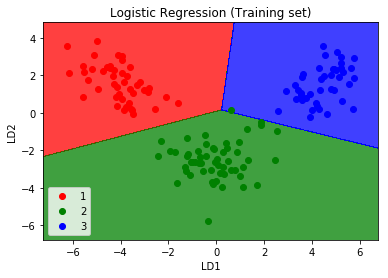

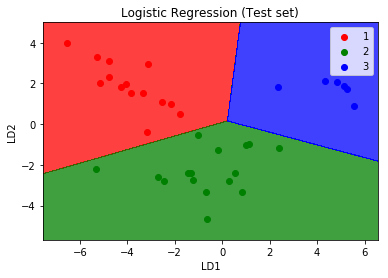

In [33]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, regressor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, regressor.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()